#### Linear Regression

$MSE(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}{m}(\theta^T \cdot x^{(i)}-y^{(i)})^2$

####  Normal Equation

$\hat{\theta}=(X^T \cdot X)^{-1} \cdot X^T \cdot y$

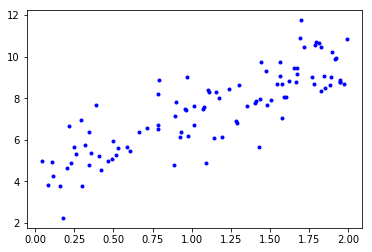

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.34269143],
       [2.77902871]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.34269143],
       [9.90074885]])

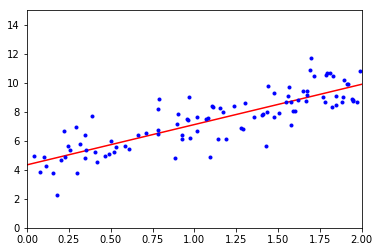

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.34269143]), array([[2.77902871]]))

In [7]:
lin_reg.predict(X_new)

array([[4.34269143],
       [9.90074885]])

#### Batch Gradient Descent

$\frac{\partial}{\partial \theta_{j}} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^{T} \cdot x^{(i)} - y^{(i)})x_{j}^{(i)}$

$\nabla_{\theta} MSE(\theta) = \frac{2}{m}X^{T} \cdot (X \cdot \theta - y)$

$\theta^{(next step)} = \theta - \eta \nabla_{\theta} MSE(\theta)$

In [8]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.34269143],
       [2.77902871]])